In [ ]:
import tensorflow as tf
import os

# Check GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Output will be 1 if GPU is available

Num GPUs Available:  1


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Put your dataset path here
# Misal ke taur par: "C:/Users/Admin/Downloads/PlantVillage"
dataset_path = "E:\plantvillage dataset\color"

# Settings
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256) # we have rtx 3090, so we can go for 512x512 as well if needed but standard is 256x256

# 1. Training Dataset (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# 2. Validation Dataset (20%) - we will use this later for evaluation
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


class_names = train_ds.class_names
print(f"Classes found: {class_names}")

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Found 54305 files belonging to 38 classes.
Using 10861 files for validation.
Classes found: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'To

In [ ]:
from tensorflow.keras import layers, models

# Model Architecture
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)), # Normalization
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax') # Output layer classes relevant
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

In [ ]:
# Model Training
EPOCHS = 15 # You can increase this for better results, if accuracy is not good enough

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/15
1358/1358 [==============================] - 64s 40ms/step - loss: 1.0684 - accuracy: 0.6918 - val_loss: 0.5396 - val_accuracy: 0.8327
Epoch 2/15
1358/1358 [==============================] - 45s 33ms/step - loss: 0.3465 - accuracy: 0.8895 - val_loss: 0.3842 - val_accuracy: 0.8785
Epoch 3/15
1358/1358 [==============================] - 45s 33ms/step - loss: 0.2015 - accuracy: 0.9337 - val_loss: 0.2486 - val_accuracy: 0.9207
Epoch 4/15
1358/1358 [==============================] - 45s 33ms/step - loss: 0.1350 - accuracy: 0.9538 - val_loss: 0.2918 - val_accuracy: 0.9152
Epoch 5/15
1358/1358 [==============================] - 45s 33ms/step - loss: 0.1067 - accuracy: 0.9647 - val_loss: 0.2848 - val_accuracy: 0.9212
Epoch 6/15
1358/1358 [==============================] - 45s 33ms/step - loss: 0.0841 - accuracy: 0.9733 - val_loss: 0.3078 - val_accuracy: 0.9182
Epoch 7/15
1358/1358 [==============================] - 45s 33ms/step - loss: 0.0731 - accuracy: 0.9745 - val_loss: 0.3522 -

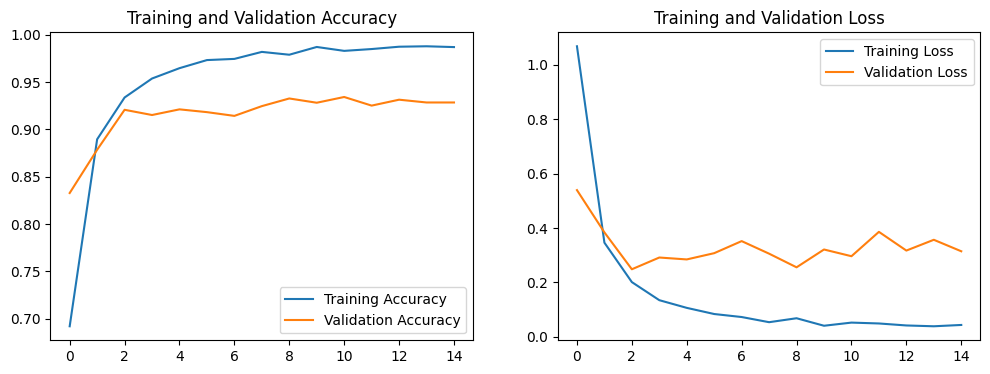

In [6]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [7]:
model.save("plant_disease_model.h5")
print("Model Saved Successfully!")

Model Saved Successfully!


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Validation data or predictions 
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification Report print 
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 [==============================] - 0s 53ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.70      0.78       120
                                 Apple___Black_rot       0.94      0.94      0.94       124
                          Apple___Cedar_apple_rust       0.93      0.75      0.83        56
                                   Apple___healthy       0.79      0.95      0.86       348
                               Blueberry___healthy       0.93      0.94      0.94       318
          Cherry_(including_sour)___Powdery_mildew       0.96      0.91      0.93       208
                 Cherry_(including_sour)___healthy       0.92      0.97      0.95       147
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.75      0.81       109
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       238
               Corn_(maize)

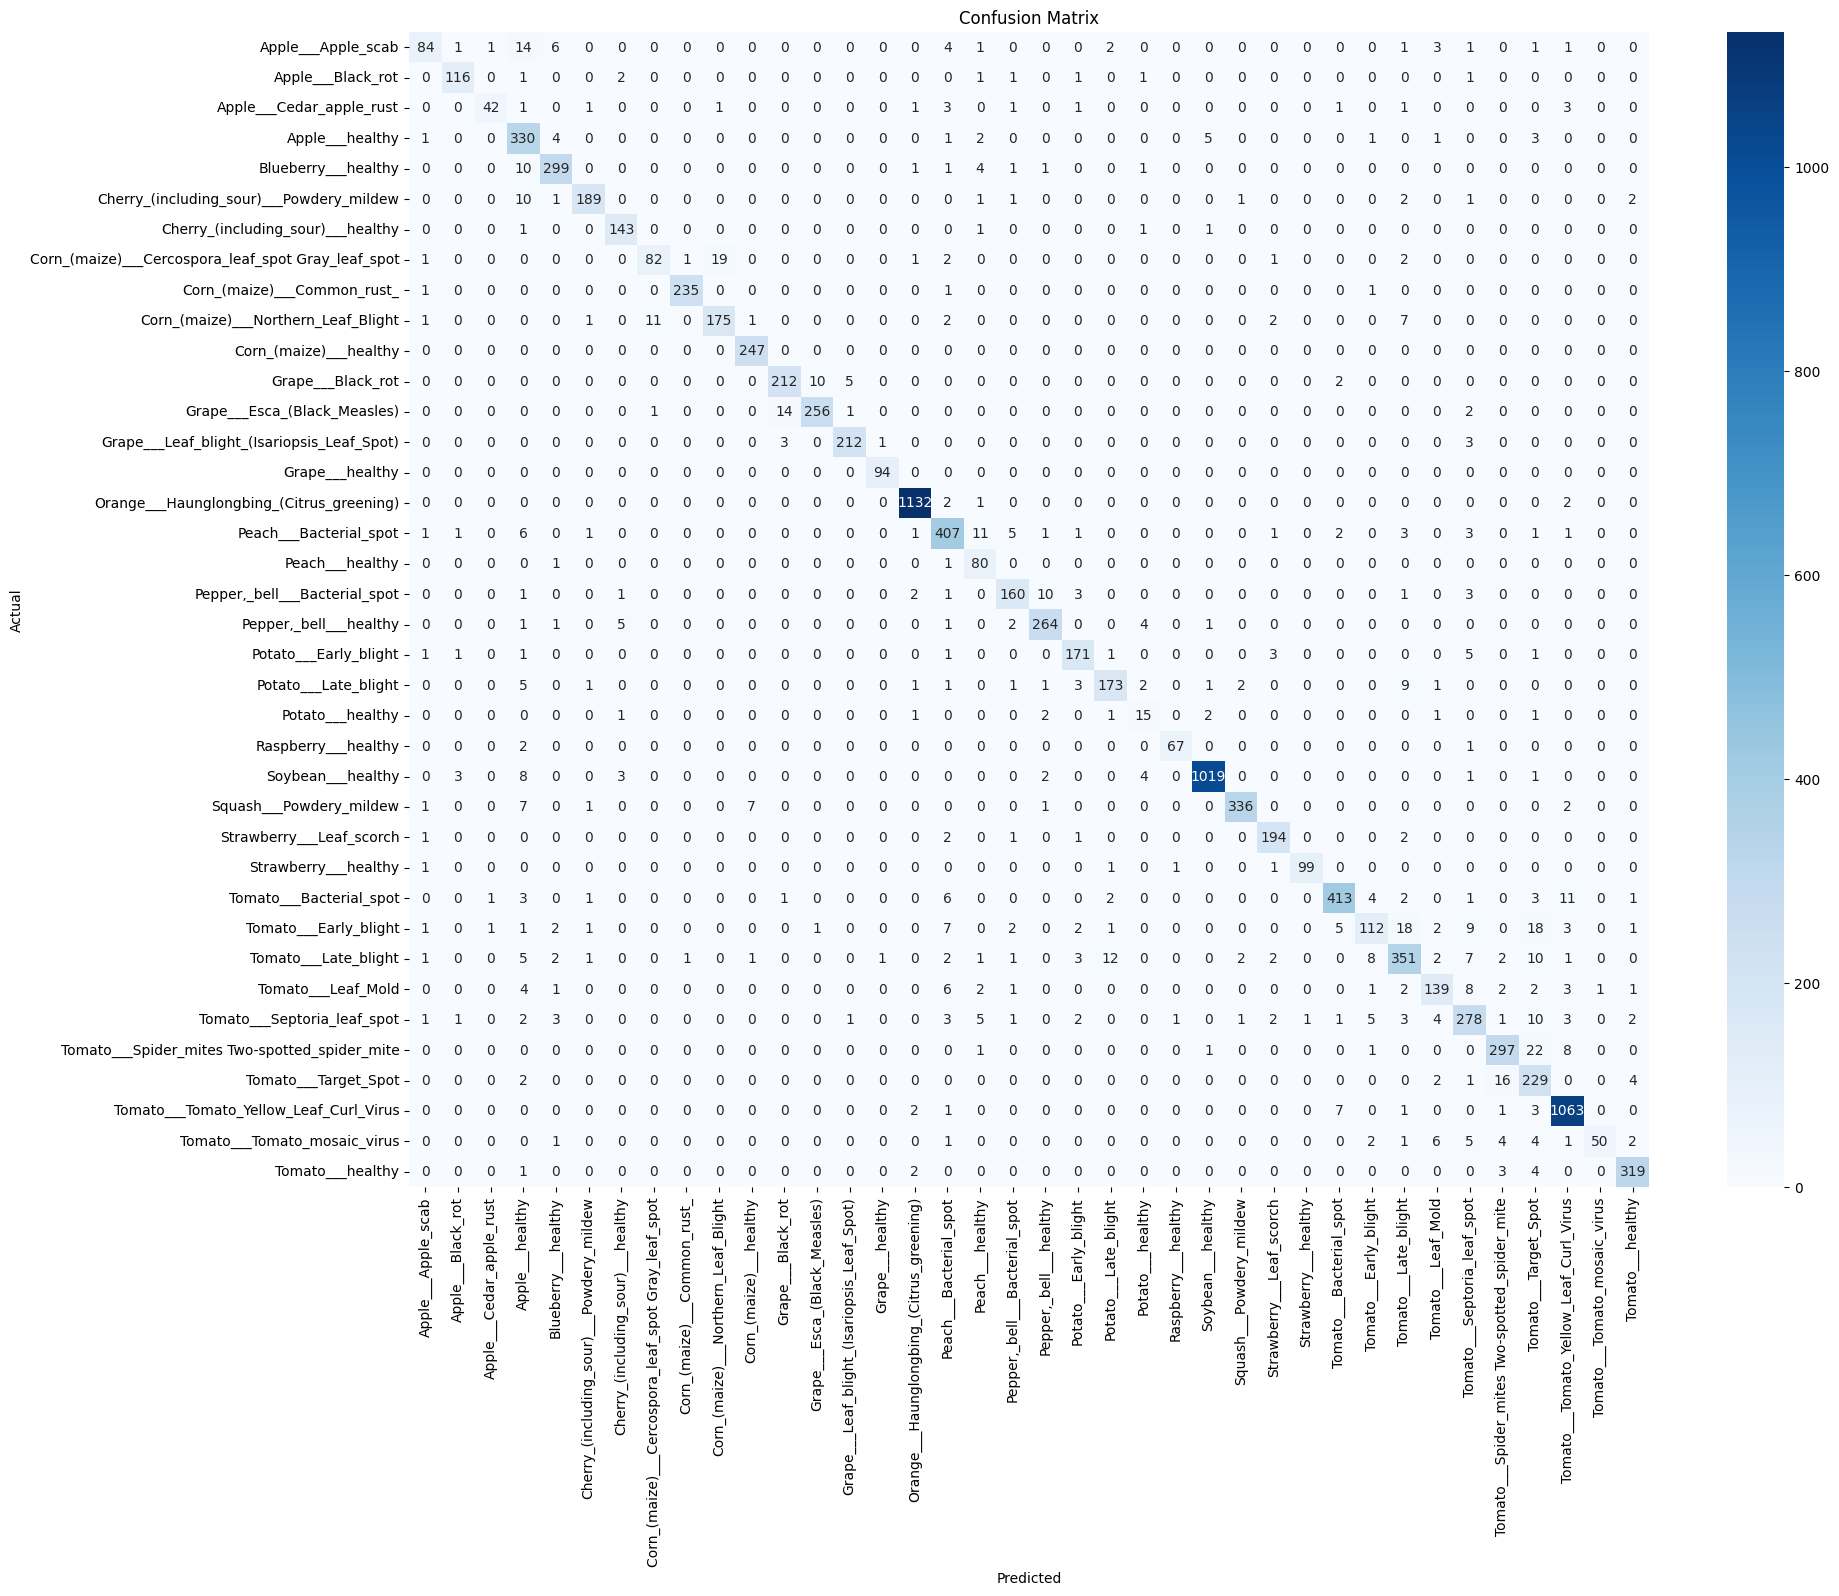

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(class_names) 

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp